# Python Script Diagramming Packages

Several Python packages support diagram generation from simple textual diagram definition scripts.

## JavaScript Rendered Diagramming

A variety of JavaScript based text to diagram tools exist that can be used to render diagrams from simple text based source scripts. Examples include:

- [`js-sequence-diagrams`](https://bramp.github.io/js-sequence-diagrams/);
- [`mermaid.js`](https://mermaid-js.github.io/mermaid/#/)
- [timing diagrams (`wavedrom`)](https://wavedrom.com/)

The [`innovationOUtside/nb_js_diagrammers`](https://github.com/innovationOUtside/nb_js_diagrammers) Python package provides a range of IPyhton magics for supporting the generation of diagrams using all these packages using simple cell block magics. 

```{note}
The [*Markdown preview enhanced*](https://shd101wyy.github.io/markdown-preview-enhanced/#/) VS Code extension provides a wide range of power tools to support the editing and previewing of native markdown documents. Among other things, the extension will offer rendered previews of diagrams from appropriate scripts using the `mermaid` and `wavedrom` JavaScript packages.

See also: [*Previewing Sphinx and Jupyter Book Rendered Mermaid and Wavedrom Diagrams in VS Code*](https://blog.ouseful.info/2021/11/02/previewing-sphinx-and-jupyter-book-rendered-mermaid-and-wavedrom-diagrams-in-vs-code/)
```

In [1]:
%load_ext nb_js_diagrammers

### Generating Timing Diagrams With `wavedrom`

In [2]:
%%wavedrom_magic -h 100

{ signal : [
  { name: "clk",  wave: "p......" },
  { name: "bus",  wave: "x.34.5x",   data: "head body tail" },
  { name: "wire", wave: "0.1..0." },
]}

### Generating Diagrams Using `mermaid.js`

Several diagram types can be generated using the `mermaid.js` package.

For example, we can generate simple flow charts:

In [3]:
%%mermaid_magic -h 500

flowchart TD
    A[Start] --> B{Is it?};
    B -->|Yes| C[OK];
    C --> D[Rethink];
    D --> B;
    B ---->|No| E[End];

More generally, we can also create simple graph diagrams:

In [4]:
%%mermaid_magic -h 250

graph TD;
    A-->B;
    A-->C;
    B-->D;
    C-->D;

We can also generate sequence diagrams:

In [5]:
%%mermaid_magic -h 350

sequenceDiagram
    Alice->>John: Hello John, how are you?
    John-->>Alice: Great!
    Alice-)John: See you later!

And entity relationship diagrams:

In [6]:
%%mermaid_magic -h 330

erDiagram
    CUSTOMER ||--o{ ORDER : places
    CUSTOMER {
        string name
        string custNumber
        string sector
    }
    ORDER {
        int orderNumber
        string deliveryAddress
    }

## Visualising Audio Files with `wavesurfer`

In [7]:
%wavesurfer_magic -f https://ia902606.us.archive.org/35/items/shortpoetry_047_librivox/song_cjrg_teasdale_64kb.mp3

## Flow Charts

As well as flow charts generated using `mermaid.js` we can also use the `flowchart.js` package.

In an interactive notebook, we can simply use the `%%flowchart_magic` block magic to render a flowchart from a flowchart definition.

```{note}
For an earlier attempt at embedding `flowchart.js` diagrams in notebooks as an `ipywidget`, see [`flowchart_js_jp_proxy_widget`](https://github.com/innovationOUtside/flowchart_js_jp_proxy_widget).
```

In [8]:
%%flowchart_magic -h 100

st=>start: Start
e=>end: End
op1=>operation: Generate
op2=>parallel: Evaluate
st(right)->op1(right)->op2
op2(path1, top)->op1
op2(path2, right)->e

In [9]:
from jp_flowchartjs.jp_flowchartjs import FlowchartWidget

# The flowchart definition script
code = """
st=>start: Start
e=>end: End
op1=>operation: Set counter to 0
op2=>operation: Draw side code
op3=>operation: Turn ninety degrees code
op4=>operation: Add 1 to counter
cond=>condition: Is counter < 4?
st(right)->op1(right)->op2->op3->cond
cond(yes, right)->op2
cond(no, bottom)->e
"""


def dummy_flowcharter(code):
    # Generate an output widget to generate SVG code
    dummy_output = FlowchartWidget()
    dummy_output.charter(code)
    return dummy_output
    
dummy_flowcharter(code)

FlowchartWidget(status='deferring flush until render')

It is also possible to generate a flowchart based on the contents of a code cell (in an interactive notebook, we can do this directly using the `%%pyflowchart_magic` block magic):

In [10]:
%%pyflowchart_magic -h 800
import time

def demo(msg='demo'):
    for i in range(10):
        print(f'{msg} loopcount is {i}')
        time.sleep(i)

FlowchartWidget(status='deferring flush until render')

Using this approach *does not* run the code however.

Another approach is to have a normal code cell:

In [11]:
import time

def demo(msg='demo'):
    for i in range(10):
        print(f'{msg} loopcount is {i}')
        time.sleep(i)

And then capture the code from this code cell and render it.

In [12]:
%%capture code
# This gets the content of the previous cell
%history -l 1

In [13]:
from pyflowchart import Flowchart

from nb_js_diagrammers.flowchartjs import TEMPLATE_FLOWCHARTJS
from nb_js_diagrammers.magics import js_ui

# Generate a flowchart from the grabbed code
fc = Flowchart.from_code(code.stdout)

# Render the flowchart
js_ui({"src":fc.flowchart()}, TEMPLATE_FLOWCHARTJS, height=800)

## Rendering SVG Schematic Diagrams from a `yosys` JSON netlist

The [`netlistsvg`](https://github.com/nturley/netlistsvg) package can generate and render an SVG schematic diagram from a netlist.

<details>
  <summary>JSON Source (click here to reveal)</summary>

```json
{
  "modules": {
    "up3down5": {
      "ports": {
        "clock": {
          "direction": "input",
          "bits": [ 2 ]
        },
        "data_in": {
          "direction": "input",
          "bits": [ 3, 4, 5, 6, 7, 8, 9, 10, 11 ]
        },
        "up": {
          "direction": "input",
          "bits": [ 12 ]
        },
        "down": {
          "direction": "input",
          "bits": [ 13 ]
        },
        "carry_out": {
          "direction": "output",
          "bits": [ 14 ]
        },
        "borrow_out": {
          "direction": "output",
          "bits": [ 15 ]
        },
        "count_out": {
          "direction": "output",
          "bits": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ]
        },
        "parity_out": {
          "direction": "output",
          "bits": [ 25 ]
        }
      },
      "cells": {
        "$add$input.v:17$3": {
          "type": "$add",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ],
            "B": [ "1", "1" ],
            "Y": [ 26, 27, 28, 29, 30, 31, 32, 33, 34, 35 ]
          }
        },
        "$and$input.v:28$5": {
          "type": "$and",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 12 ],
            "B": [ 35 ],
            "Y": [ 36 ]
          }
        },
        "$and$input.v:29$6": {
          "type": "$and",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13 ],
            "B": [ 37 ],
            "Y": [ 38 ]
          }
        },
        "$procdff$40": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 39, 40, 41, 42, 43, 44, 45, 46, 47 ],
            "Q": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ]
          }
        },
        "$procdff$41": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 36 ],
            "Q": [ 14 ]
          }
        },
        "$procdff$42": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 38 ],
            "Q": [ 15 ]
          }
        },
        "$procdff$43": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 48 ],
            "Q": [ 25 ]
          }
        },
        "$procmux$36": {
          "type": "$pmux",
          "port_directions": {
            "A": "input",
            "B": "input",
            "S": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ],
            "B": [ 26, 27, 28, 29, 30, 31, 32, 33, 34, 49, 50, 51, 52, 53, 54, 55, 56, 57, 3, 4, 5, 6, 7, 8, 9, 10, 11 ],
            "S": [ 58, 59, 60 ],
            "Y": [ 39, 40, 41, 42, 43, 44, 45, 46, 47 ]
          }
        },
        "$procmux$37_CMP0": {
          "type": "$eq",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13, 12 ],
            "B": [ "0", "1" ],
            "Y": [ 58 ]
          }
        },
        "$procmux$38_CMP0": {
          "type": "$eq",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13, 12 ],
            "B": [ "1", "0" ],
            "Y": [ 59 ]
          }
        },
        "$procmux$39_CMP0": {
          "type": "$eq",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13, 12 ],
            "B": [ "0", "0" ],
            "Y": [ 60 ]
          }
        },
        "$reduce_xor$input.v:27$4": {
          "type": "$reduce_xor",
          "port_directions": {
            "A": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 39, 40, 41, 42, 43, 44, 45, 46, 47 ],
            "Y": [ 48 ]
          }
        },
        "$sub$input.v:16$2": {
          "type": "$sub",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ],
            "B": [ "1", "0", "1" ],
            "Y": [ 49, 50, 51, 52, 53, 54, 55, 56, 57, 37 ]
          }
        }
      }
    }
  }
}
```
</details>

In [14]:
netlist = {
  "modules": {
    "up3down5": {
      "ports": {
        "clock": {
          "direction": "input",
          "bits": [ 2 ]
        },
        "data_in": {
          "direction": "input",
          "bits": [ 3, 4, 5, 6, 7, 8, 9, 10, 11 ]
        },
        "up": {
          "direction": "input",
          "bits": [ 12 ]
        },
        "down": {
          "direction": "input",
          "bits": [ 13 ]
        },
        "carry_out": {
          "direction": "output",
          "bits": [ 14 ]
        },
        "borrow_out": {
          "direction": "output",
          "bits": [ 15 ]
        },
        "count_out": {
          "direction": "output",
          "bits": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ]
        },
        "parity_out": {
          "direction": "output",
          "bits": [ 25 ]
        }
      },
      "cells": {
        "$add$input.v:17$3": {
          "type": "$add",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ],
            "B": [ "1", "1" ],
            "Y": [ 26, 27, 28, 29, 30, 31, 32, 33, 34, 35 ]
          }
        },
        "$and$input.v:28$5": {
          "type": "$and",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 12 ],
            "B": [ 35 ],
            "Y": [ 36 ]
          }
        },
        "$and$input.v:29$6": {
          "type": "$and",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13 ],
            "B": [ 37 ],
            "Y": [ 38 ]
          }
        },
        "$procdff$40": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 39, 40, 41, 42, 43, 44, 45, 46, 47 ],
            "Q": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ]
          }
        },
        "$procdff$41": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 36 ],
            "Q": [ 14 ]
          }
        },
        "$procdff$42": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 38 ],
            "Q": [ 15 ]
          }
        },
        "$procdff$43": {
          "type": "$dff",
          "port_directions": {
            "CLK": "input",
            "D": "input",
            "Q": "output"
          },
          "connections": {
            "CLK": [ 2 ],
            "D": [ 48 ],
            "Q": [ 25 ]
          }
        },
        "$procmux$36": {
          "type": "$pmux",
          "port_directions": {
            "A": "input",
            "B": "input",
            "S": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ],
            "B": [ 26, 27, 28, 29, 30, 31, 32, 33, 34, 49, 50, 51, 52, 53, 54, 55, 56, 57, 3, 4, 5, 6, 7, 8, 9, 10, 11 ],
            "S": [ 58, 59, 60 ],
            "Y": [ 39, 40, 41, 42, 43, 44, 45, 46, 47 ]
          }
        },
        "$procmux$37_CMP0": {
          "type": "$eq",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13, 12 ],
            "B": [ "0", "1" ],
            "Y": [ 58 ]
          }
        },
        "$procmux$38_CMP0": {
          "type": "$eq",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13, 12 ],
            "B": [ "1", "0" ],
            "Y": [ 59 ]
          }
        },
        "$procmux$39_CMP0": {
          "type": "$eq",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 13, 12 ],
            "B": [ "0", "0" ],
            "Y": [ 60 ]
          }
        },
        "$reduce_xor$input.v:27$4": {
          "type": "$reduce_xor",
          "port_directions": {
            "A": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 39, 40, 41, 42, 43, 44, 45, 46, 47 ],
            "Y": [ 48 ]
          }
        },
        "$sub$input.v:16$2": {
          "type": "$sub",
          "port_directions": {
            "A": "input",
            "B": "input",
            "Y": "output"
          },
          "connections": {
            "A": [ 16, 17, 18, 19, 20, 21, 22, 23, 24 ],
            "B": [ "1", "0", "1" ],
            "Y": [ 49, 50, 51, 52, 53, 54, 55, 56, 57, 37 ]
          }
        }
      }
    }
  }
}

import json

fn = 'netlist.json'

with open(fn, 'w') as f:
    json.dump(netlist, f)

In [15]:
%%capture 

fn_svg = "netlist.svg"

# Install the netlistsvg package (requires node)
#!npm install -g netlistsvg
!netlistsvg $fn -o $fn_svg

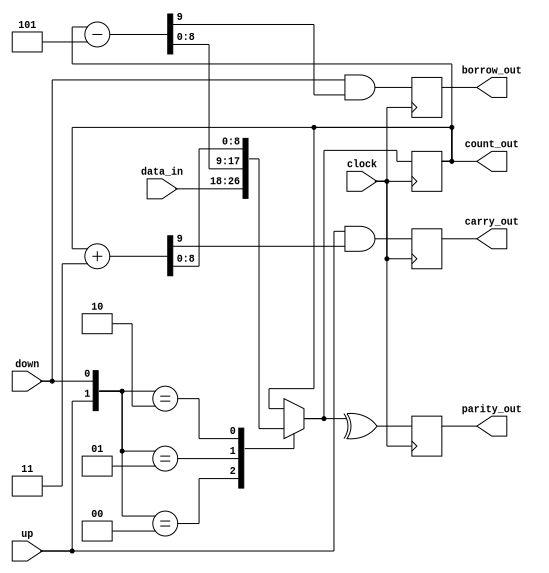

In [16]:
from IPython.display import SVG

SVG(fn_svg)